<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/512_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17898818597920019690
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4407731289909978156
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 16)      

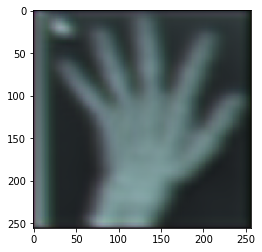

In [4]:
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt

np.random.seed(42)

img_size=256


img_data=[]

img=cv2.imread('/content/drive/MyDrive/1377.png', 1)
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_img=cv2.resize(rgb_img, (256,256))
img_data.append(img_to_array(rgb_img))
img_final=np.reshape(img_data, (len(img_data),256, 256, 3))
img_final=img_final.astype('float32')/255


model=Sequential()

model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(16, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

model.summary()

model.fit(img_final, img_final, epochs=15, shuffle=True)


pred=model.predict(img_final)
print(pred.shape)


plt.imshow(pred.reshape(256,256,3))

In [15]:
print(pred.shape)
#pred=cv2.cvtColor(pred[0], cv2.COLOR_BGR2RGB)

#print(pred.shape)

(3, 3, 3)


##Youtube

In [2]:
import pandas as pd
train_dir = '/content/drive/MyDrive/small_data/train'
df = pd.read_csv('/content/drive/MyDrive/small_data/train_csv1.csv')

In [3]:
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt


In [4]:
import numpy as np
import cv2
import os
import pandas as pd
from six.moves import cPickle

In [6]:

cnt=1
path = train_dir
print ('Loading data set...')
img_data=[]
for i in os.listdir(path):
  #print(i)
  #print(cnt)
  #cnt=cnt+1
  if(len(i)>9):   #errror occuring  so to 
    continue
  img_path = path + "/"+i
  img=cv2.imread(img_path)
  rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  rgb_img=cv2.resize(rgb_img, (512,512))
  img_data.append(np.array(rgb_img))
  img_final=np.reshape(img_data, (len(img_data),512,512, 3))
  img_final=img_final.astype('float32')/255

print(img_final.shape)

Loading data set...
(71, 512, 512, 3)


In [7]:
from sklearn.model_selection import train_test_split

IMG_SHAPE = img_final.shape[1:]

X_train, X_test = train_test_split(img_final, test_size=0.1, random_state=42)

print(IMG_SHAPE)

(512, 512, 3)


In [8]:

def show_image(x):
    Image = x/np.amax(x)
    Image = np.clip(Image, 0, 1)
    plt.imshow(Image)

X shape: (71, 512, 512, 3)


26

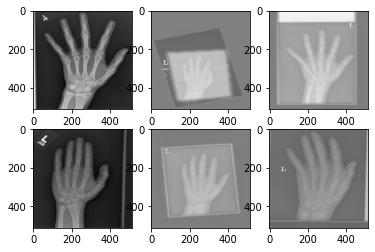

In [9]:
plt.title('sample images')

for i in range(6):
    plt.subplot(2,3,i+1)
    show_image(img_final[i])

print("X shape:", img_final.shape)
#print("attr shape:", attr.shape)

# try to free memory
del img_final
import gc
gc.collect()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import save_model
#from tensorflow.python.framework import ops
import tensorflow.keras.layers as L
#import tensorflow.compat.v1.keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
#from lfw_dataset import load_lfw_dataset
import matplotlib.pyplot as plt
#import keras_utils
import numpy as np

In [11]:
def build_deep_autoencoder(img_shape, code_size):
    """PCA's deeper brother. See instructions above. Use `code_size` in layer definitions."""
    H,W,C = img_shape
    
    # encoder
    encoder = tf.keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=512, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=1024, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=2048, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=4096, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))

    # decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    
    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Dense(2*2*4096))
    decoder.add(L.Reshape((2, 2, 4096)))
    decoder.add(L.Conv2DTranspose(filters=2048, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=1024, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [17]:
# Check autoencoder shapes along different code_sizes
get_dim = lambda layer: np.prod(layer.output_shape[1:])
for code_size in [1,8,32,128,512]:
    tf.keras.backend.clear_session()
    encoder, decoder = build_deep_autoencoder(IMG_SHAPE, code_size=code_size)
    print("Testing code size %i" % code_size)
    assert encoder.output_shape[1:]==(code_size,),"encoder must output a code of required size"
    assert decoder.output_shape[1:]==IMG_SHAPE,   "decoder must output an image of valid shape"
    assert len(encoder.trainable_weights)>=6,     "encoder must contain at least 3 layers"
    assert len(decoder.trainable_weights)>=6,     "decoder must contain at least 3 layers"
    
    for layer in encoder.layers + decoder.layers:
        assert get_dim(layer) >= code_size, "Encoder layer %s is smaller than bottleneck (%i units)"%(layer.name,get_dim(layer))

print("All tests passed!")

Testing code size 1
Testing code size 8
Testing code size 32
Testing code size 128
Testing code size 512
All tests passed!


In [12]:
print(IMG_SHAPE)
tf.keras.backend.clear_session()
encoder, decoder = build_deep_autoencoder((512,512,3), code_size=512)
encoder.summary()
decoder.summary()

(512, 512, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 6

In [13]:
inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

In [14]:
autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [15]:
model_filename = 'autoencoder.{0:03d}.hdf5'
last_finished_epoch = None

In [16]:
class ModelSaveCallback(tf.keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        model_filename = self.file_name.format(epoch)
        save_model(self.model, model_filename)
        print("Model saved in {}".format(model_filename))

In [17]:
autoencoder.fit(x=X_train, y=X_train, epochs=2,
                validation_data=[X_test, X_test],
                callbacks=[ModelSaveCallback(model_filename)],
                           #keras_utils.TqdmProgressCallback()],
                verbose=1,
                initial_epoch=last_finished_epoch or 0)

Epoch 1/2
2/2 [==============================] - 216s 118s/step - loss: 0.2655 - val_loss: 0.2278
Epoch 2/2
2/2 [==============================] - 210s 114s/step - loss: 0.2494 - val_loss: 0.2089


In [25]:
#def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    #Image = reco/np.amax(reco)
    #Image = np.clip(Image, 0, 1)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

In [28]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    
    Image = reco/np.amax(reco)
    Image = np.clip(Image, 0, 1)
    plt.title("Reconstructed")
    #show_image(Image)
    plt.imshow((reco * 255).astype(np.uint8))

In [29]:
reconstruction_mse = autoencoder.evaluate(X_test, X_test, verbose=0)
print("Convolutional autoencoder MSE:", reconstruction_mse)


Convolutional autoencoder MSE: 0.20890408754348755


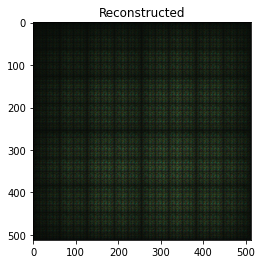

In [30]:
for i in range(5):
    img = X_test[i]
    #Image = img/np.amax(img)
    #img = np.clip(Image, 0, 1)

    #print(img.shape)
    visualize(img,encoder,decoder)

In [144]:
# save trained weights
encoder.save_weights("encoder.h5")
decoder.save_weights("decoder.h5")